In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3789,ham,I love you !!! You know? Can you feel it? Does...,NaN,NaN,NaN
5234,ham,Ok cool. See ya then.,NaN,NaN,NaN
2193,ham,I called but no one pick up e phone. I ask bot...,NaN,NaN,NaN
3761,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
1650,ham,I dont have any of your file in my bag..i was ...,NaN,NaN,NaN
3871,ham,I am joining today formally.Pls keep praying.w...,NaN,NaN,NaN
2827,ham,Wife.how she knew the time of murder exactly,NaN,NaN,NaN
1676,ham,"Yeah, that's fine! It's å£6 to get in, is that...",NaN,NaN,NaN
1178,ham,"I'm outside islands, head towards hard rock an...",NaN,NaN,NaN
1593,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Steps to be followed :
    1. Data Cleaning
    2. EDA (Exploratory Data Analysis)
    3. Text Preprocessing
    4. Model Building
    5. Evaluation
    6. Improvement
    7. Website
    8. Deployment

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# extra null columns which has very less data.. we can drop them.. last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
# renaming columns to descriptive names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# vectorise the target column to number
# LabelEncoder is a library in scikit learn used to convert categories into numbers only for target variables and not features

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.sample(15)

,target,text
3909,0,She.s good. She was wondering if you wont say ...
996,0,Yetunde i'm in class can you not run water on ...
4971,0,I'm fine. Hope you are good. Do take care.
3529,0,Tyler (getting an 8th) has to leave not long a...
4678,0,Sry da..jst nw only i came to home..
2745,0,R Ì_ going 4 today's meeting?
1356,0,U ned to convince him tht its not possible wit...
4181,1,Urgent! Please call 0906346330. Your ABTA comp...
846,0,My stomach has been thru so much trauma I swea...
3830,0,Let's pool our money together and buy a bunch ...


In [13]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

# 2. EDA

In [17]:
# we want to know % of ham and spam messages

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

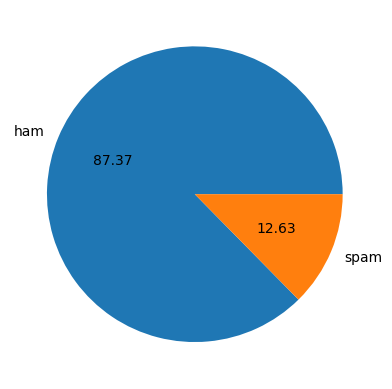

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
# therefore data is imbalanced since the % diff is too high

In [20]:
# now we want to check how many chars, words and sentences are there in each sms

df['num_characters']=df['text'].apply(lambda x: len(x))

In [21]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [23]:
# s="is your name is soumita?"
# text=nlp(s)
# nlp(s) processes the text data in the small model
# for token in text:
#     if not token.is_punct and not token.is_space:
#         print(token)

#------------ count words without punctuations and spaces --------------

df['num_words']= df['text'].apply(lambda x :len([token for token in nlp(x)]))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# s="my name is soumita. my fatgher's name is moumita. I am a nice girl: but she is better."
# text=nlp(s)

# print(list(text.sents))

In [26]:
df['num_sentences']= df['text'].apply(lambda x : len(list(nlp(x).sents)))

In [27]:
# check the statistics for spam

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [28]:
# check the statistics for ham

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

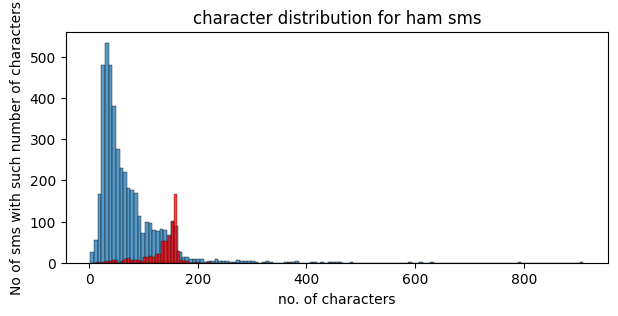

In [30]:
plt.figure(figsize=(7,3))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.title('character distribution for ham sms')
plt.xlabel('no. of characters')
plt.ylabel('No of sms with such number of characters')
plt.show()

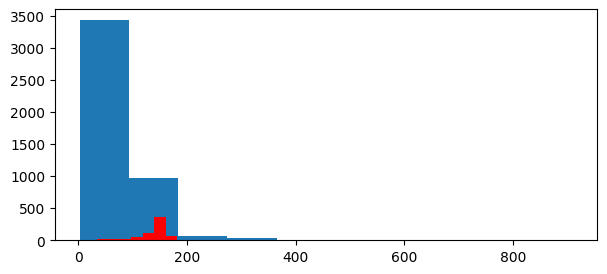

In [31]:
plt.figure(figsize=(7,3))
plt.hist(df[df['target']==0]['num_characters'])
plt.hist(df[df['target']==1]['num_characters'],color='red')
plt.show()

<BarContainer object of 4516 artists>

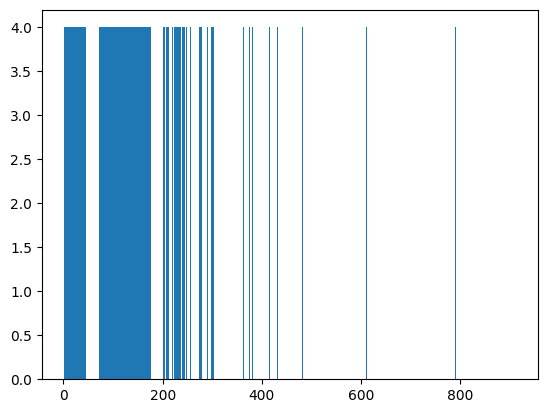

In [32]:
plt.bar(df[df['target']==0]['num_characters'],height=4)

<Axes: ylabel='num_characters'>

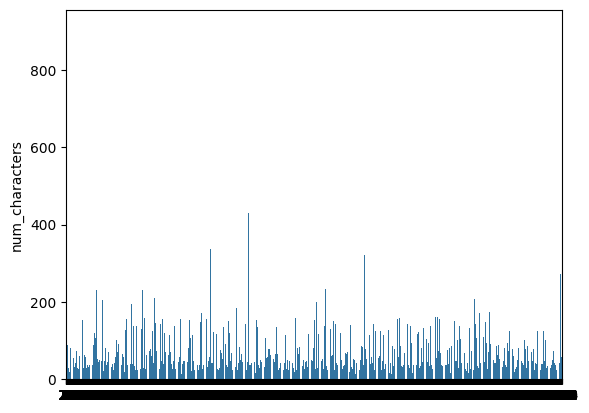

In [33]:
sns.barplot(df[df['target']==0]['num_characters'])

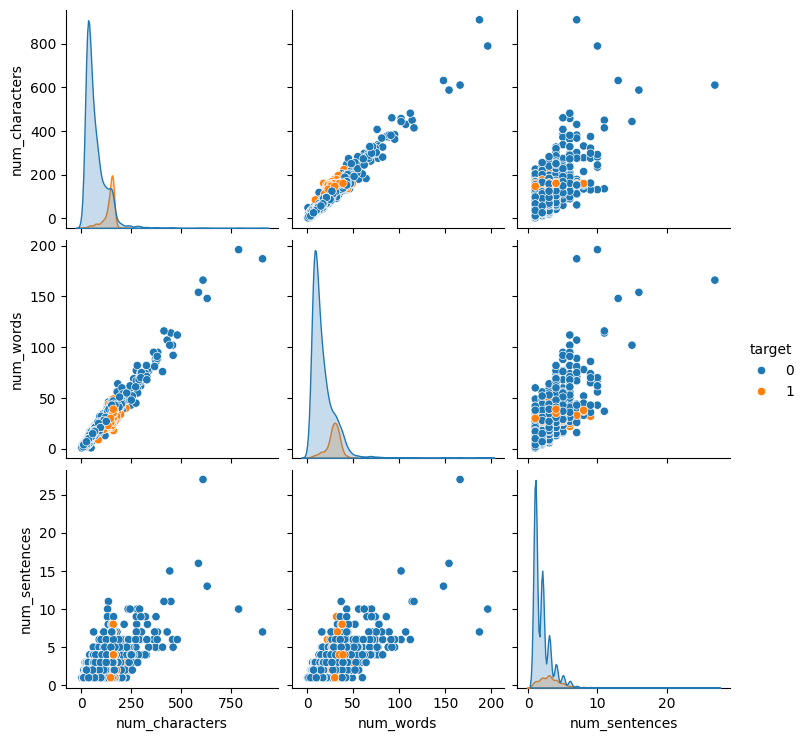

In [34]:
# checking relationship between the columns

sns.pairplot(df,hue='target')

In [35]:
# finding corelation using Pearson's crelation coefficient

df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.283608,0.251106
num_characters,0.384717,1.000000,0.973170,0.688210
num_words,0.283608,0.973170,1.000000,0.731992
num_sentences,0.251106,0.688210,0.731992,1.000000


<Axes: >

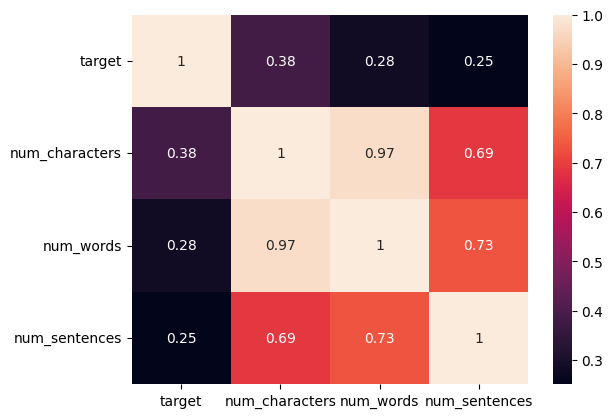

In [36]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

**conclusion from Pearson's corelation - since target and num_char col has highest correlation, so will take num_char as feature col**

## Steps in Data Preprocessing:
    1. Lower Case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuations
    5. Stemming

In [37]:
def transform_text(text):
    li=[]
    # processing th text using spacy pretarined small size model
    text=text.lower()
    text=nlp(text)
    for token in text:
        if not token.is_punct and not token.is_space and not token.is_stop and (token.is_alpha or token.is_digit):
            li.append(token.lemma_)
    return ' '.join(li)

In [38]:
df['text_alphanum']=df['text'].apply(transform_text)

In [39]:
df['text_alphanum']

0       jurong point crazy available bugis n great wor...
1                                   ok lar joke wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                                     u dun early hor u c
4                                   nah think go usf live
                              ...                        
5567    time try 2 contact u win pound prize 2 claim e...
5568                             ì b go esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching act like interested buy week give...
5571                                            rofl true
Name: text_alphanum, Length: 5169, dtype: object

In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=4000,height=4000,background_color='white',min_font_size=50)

In [41]:
spam_wc=wc.generate(df[df['target']==1]['text_alphanum'].str.cat(sep=" "))

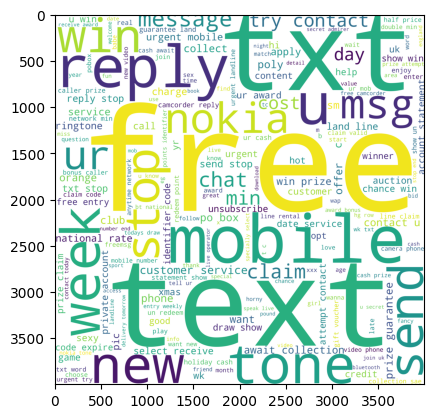

In [42]:
plt.imshow(spam_wc)

In [43]:
ham_wc=wc.generate(df[df['target']==0]['text_alphanum'].str.cat(sep=" "))

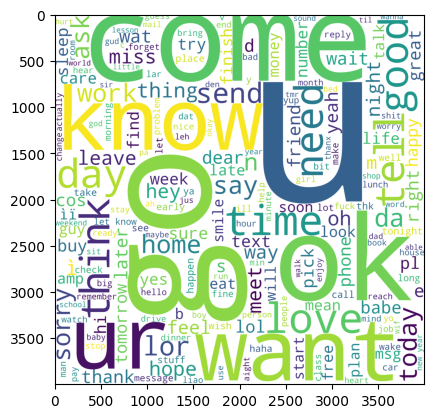

In [44]:
plt.imshow(ham_wc)

In [45]:
# I want to check most frequent top 30 words in spam mesg
spam_corpus=[]
for li in df[df['target']==1]['text_alphanum'].tolist():
    for word in li.split():
        spam_corpus.append(word)

In [46]:
from collections import Counter

df_=pd.DataFrame(Counter(spam_corpus).most_common(30))


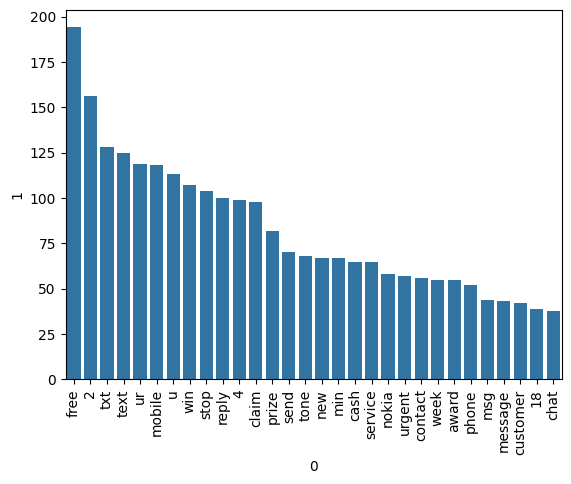

In [47]:
sns.barplot(x=df_.iloc[:,0],y=df_.iloc[:,1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

**Nieve Bays classifier (words good with text data as a classifier)**

***since our features/input variable is text, we have to convert them into vectors using:***
1. Bag of Words
2. TF-IDF
3. Word2Vec

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [51]:
x=cv.fit_transform(df['text_alphanum']).toarray()

In [52]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [67]:
gnb.fit(x_train,y_train)
y_prd1=gnb.predict(x_test)

In [68]:
y_prd1

array([0, 1, 1, ..., 0, 0, 0])

In [70]:
print(accuracy_score(y_prd1,y_test))
print(precision_score(y_prd1,y_test))
print(confusion_matrix(y_prd1,y_test))

0.8346228239845261
0.8840579710144928
[[741  16]
 [155 122]]


In [71]:
bnb.fit(x_train,y_train)
y_prd2=bnb.predict(x_test)

print(accuracy_score(y_prd2,y_test))
print(precision_score(y_prd2,y_test))
print(confusion_matrix(y_prd2,y_test))

0.9690522243713733
0.7971014492753623
[[892  28]
 [  4 110]]


In [72]:
mnb.fit(x_train,y_train)
y_prd3=mnb.predict(x_test)

print(accuracy_score(y_prd3,y_test))
print(precision_score(y_prd3,y_test))
print(confusion_matrix(y_prd3,y_test))

0.9671179883945842
0.9202898550724637
[[873  11]
 [ 23 127]]
